<a href="https://colab.research.google.com/github/cafechungkhoan/deeplearning-predict-stock/blob/main/Deep_Learning_Predict_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **10 Model Machine Learning phổ biến trong dự báo xu hướng giá cổ phiếu**

Thị trường chứng khoán là nơi mà mọi người đều mong muốn tìm ra các "câu thần chú" để dự đoán thành công giá cổ phiếu. Mặc dù vậy, hầu như giá là thứ không thể dự đoán một cách chính xác. 

Trong bài viết này, mình sẽ giới thiệu qua một thư viện rất hay, hỗ trợ cả 10 Model phổ biến nhất trong dự báo chuỗi thời gian. Và áp dụng thử 4 Model là SARIMA, Facebook Prophet, HoltWinters & Vector autoregression (VAR), để mô phỏng lại quá trình dự báo giá dựa trên lịch sử giá.

Thư viện Kats do Facebook's Data Science team xây dựng và phát triển. Trong thư viện có support hầu hết các model dự báo Time Series phổ biến như: Linear
, Quadratic, ARIMA, SARIMA, Holt-Winters, Prophet, AR-Net, Theta, VAR. Hay thậm chí model Deep Learning là LSTM.

**Lưu ý:**
* Model được áp dụng đơn giản, chưa Tuning Parameter cũng như khung thời gian train là rất ngắn. Do đó những Model trong bài viết mang tính chất giới thiệu là chính, còn hiệu quả về mặt đầu tư thì cần phải có thời gian đánh giá lại. Việc chỉ dùng giá mở cửa, cao nhất, thấp nhất, khối lượng để dự báo giá đóng cửa mang rất nhiều rủi ro (đọc thêm bài viết https://towardsdatascience.com/is-it-possible-to-predict-stock-prices-with-a-neural-network-d750af3de50b)
* Model thiết lập đơn giản đến mức bạn có thể clone một bản trên colab, và chỉ thay đổi dữ liệu đầu vào theo đúng cấu trúc là được.
* Thư viện KATS cũng có hỗ trợ cả việc điều chỉnh tham số (Tuning Parameter) của các Model, cũng như Backtesting error như MAE, MSE, RMSE, MAPE,... Tuy nhiên, mình sẽ viết về phần này trong một bài viết khác!
* Dữ liệu bên dưới là dữ liệu của Vn-Index từ 2009 đến 2021, mình trích xuất từ V-Pro của Chứng Khoán Bản Việt (HoSE:VCI). Bên dưới cũng có hướng dẫn cách export nhanh cho ai muốn vọc thử liền. (ai muốn dùng thử VPro thì mở tk ở đây: https://invest.vcsc.com.vn/mo-tai-khoan-online?ref=hieult)
* Mình cũng có viết những bài viết khác về áp dụng AI trong đầu tư như: Algo Trading trong phân tích tâm lí thị trường (Sentiment), Áp dụng Machine Learning trong dự báo lợi nhuận đầu tư,... Tham khảo thêm tại: https://www.cafechungkhoan.com/search/label/ai?&max-results=12

---
**Lê Đặng Trung Hiếu**

Supervisor - Phòng ABS, CTCP Chứng Khoán Bản Việt (HoSE: VCI)

Tầng 8, Sailing Tower, 111A Pasteur, Quận 1, TpHCM

Kết nối bạn bè: [Facebook](https://www.facebook.com/ledangtrunghieu) | [Linkedin](https://www.linkedin.com/in/hi%E1%BA%BFu-l%C3%AA-%C4%91%E1%BA%B7ng-trung-b968014b/) | [GitHub](https://github.com/cafechungkhoan) | [Website](https://www.cafechungkhoan.com)

---


OK không nói nhiều nữa, bắt đầu thôi!

Đầu tiên là applied thư viện KATS:

In [ ]:
pip install kats

Mình nhập data mẫu từ VPro lên github để call cho dễ. Nếu bạn nào có biết nơi để call dữ liệu realtime (nhưng cần free để ai cũng dùng dc :D ) thì comment support mình nhé.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://github.com/cafechungkhoan/deeplearning-predict-stock/blob/main/VCI.xls?raw=true'
df = pd.read_excel(url)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Ở đây mình chỉ giới thiệu thư viện & các thuật toán, nên mình chỉ filter ra 200 phiên gần nhất để chạy các Model mẫu. (đỡ phải chờ lâu :))

Bạn có thể dùng nhiều dữ liệu train hơn nếu muốn.

## **Tiền xử lí dữ liệu**
---

In [39]:
df = df.iloc[:200]
df = df.iloc[::-1]
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Time,Open,High,Low,Close,Volume
199,2020-11-20,09:00:00,19000,19300,18750,18850,1079310
198,2020-11-23,09:00:00,18850,19450,18850,19100,811810
197,2020-11-24,09:00:00,19100,19550,18900,19500,967480
196,2020-11-25,09:00:00,19650,20000,19250,19350,891260
195,2020-11-26,09:00:00,19300,19500,19000,19350,491340
...,...,...,...,...,...,...,...
4,2021-09-06,09:00:00,61000,61400,59800,61300,6138100
3,2021-09-07,09:00:00,61500,65500,61500,64300,9923700
2,2021-09-08,09:00:00,65000,65000,62300,63200,5975100
1,2021-09-09,09:00:00,63000,63500,62100,63500,4864700


In [40]:
df1 = df.set_index('Date')

**Set up 2 tệp dữ liệu đào tạo và kiểm tra**

* Chắc hẳn mọi người sẽ hỏi vì sao không random như các bài toán ML khác? thì mình xin trả lời ngắn gọn là do tính chất của bài toán dự báo, dữ liệu cơ sở là dùng giá lịch sử để dự báo là giá của ngày hôm sau. (trong bài là giá đóng cửa)
* Và còn một điều cần phải thống nhất nữa, mình setup train 170 phiên & giữ lại test 30 phiên. Trên phần vẽ biểu đồ, mình compair phần model tính toán với phần data real để tiện so sánh độ hiệu quả bằng mắt.

In [41]:
Close = df1["Close"].to_frame()
train_len = 170
train = Close.iloc[:train_len]
test = Close.iloc[train_len:]

In [42]:
from kats.consts import TimeSeriesData
ts = TimeSeriesData(train.reset_index(), time_col_name="Date")
test = test.reset_index()
test['Date'] = pd.to_datetime(test['Date'])

## **Chạy các Model Machine Learning**
---

### **Model SARIMA**

SARIMA và ARIMA là những mô hình sử dụng rộng rãi nhất để dự báo chuỗi thời gian.ARIMA model là viết tắt của cụm từ Autoregressive Intergrated Moving Average. Mô hình sẽ biểu diễn phương trình hồi qui tuyến tính đa biến (multiple linear regression) của các biến đầu vào, còn SARIMA về bản chất là mô hình ARIMA nhưng được điều chỉnh đặc biệt để áp dụng cho những chuỗi thời gian có yếu tố mùa vụ.

Phía dưới mình biều diễn 2 biểu đồ với 2 ý nghĩa khác nhau:
* Biểu đồ đầu tiên là so sánh giá (Close) giữa thực tế và model dự báo.
* Biểu đồ thứ 2 là giá lịch sử (170 phiên) & giá dự báo (30 phiên tiếp theo)

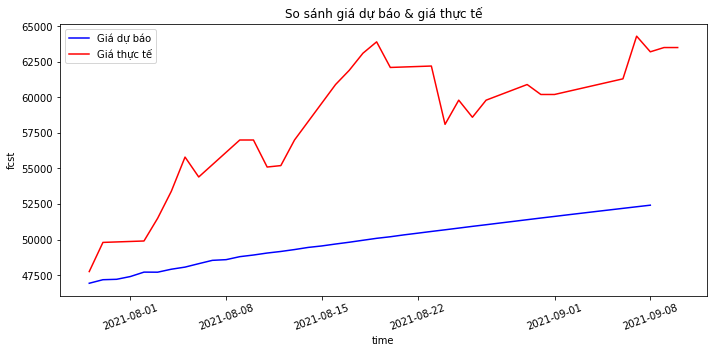

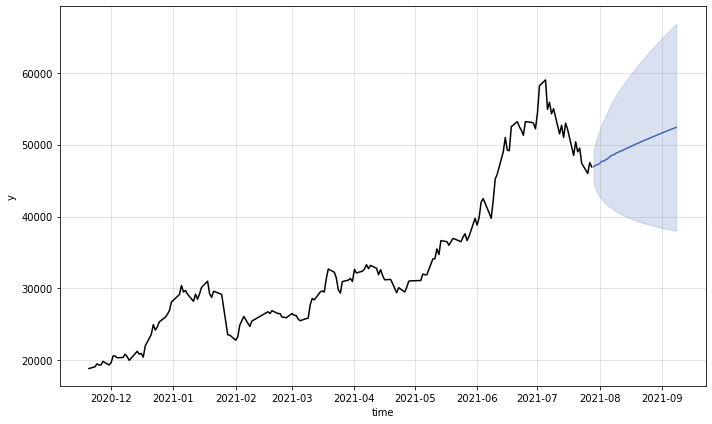

In [48]:
# Setup & Train Model
from kats.models.sarima import SARIMAModel, SARIMAParams
params = SARIMAParams(p = 2, d=1, q=1, trend = 'ct', seasonal_order=(1,0,1,12))
m = SARIMAModel(data=ts, params=params)
m.fit()
fcst = m.predict(steps=42, freq="D")

# Plot chart so sánh
plt.figure(figsize = (11.6,5))
plt.xticks(rotation=20)
plt.title('So sánh giá dự báo & giá thực tế')
sns.lineplot(x=fcst['time'], y=fcst['fcst'], label="Giá dự báo", color="b")
sns.lineplot(x=test['Date'], y=test['Close'], label ="Giá thực tế", color = 'red')
m.plot()

### **Model Facebook Prophet**

Thuật toán Facebook Prophet được giới thiệu lần đầu vào năm 2017, do Facebook’s Core Data Science team sáng tạo nên. Facebook Prophet cung cấp các thông số trực quan, dễ điều chỉnh. Ngay cả những người không đủ chuyên môn sâu về các mô hình dự báo chuỗi thời gian (như mình) cũng có thể sử dụng.

Facebook Prophet còn có nhiều tính năng hay như xác định tính mùa vụ theo ngày / tháng, xác định phiên giao dịch bất thường (outlier detection)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


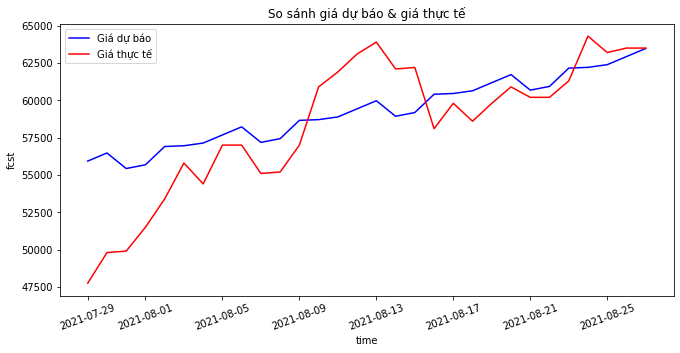

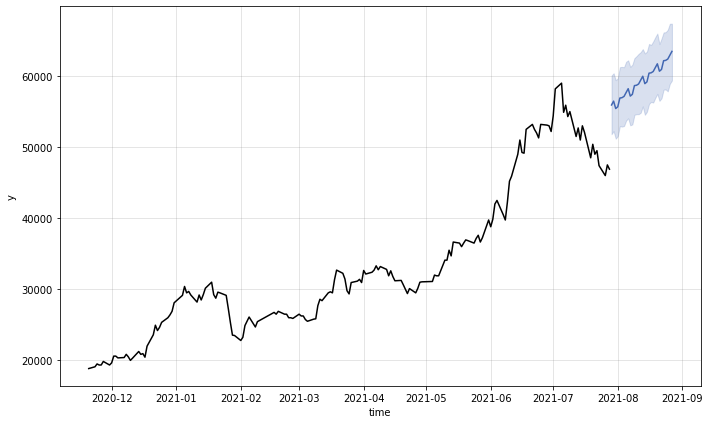

In [29]:
from kats.models.prophet import ProphetModel, ProphetParams
params = ProphetParams(seasonality_mode="additive")
m = ProphetModel(ts,params)
m.fit()
fcst = m.predict(steps=30, freq="D")
fcst['Close'] = test['Close']
import seaborn as sns
plt.figure(figsize = (11,5))
plt.xticks(rotation=20)
plt.title('So sánh giá dự báo & giá thực tế')
sns.lineplot(x=fcst['time'], y=fcst['fcst'], label="Giá dự báo", color="b")
sns.lineplot(x=fcst['time'], y=fcst['Close'], label ="Giá thực tế", color = 'red')
m.plot()

### **Model HoltWinters**

Mình không tìm hiểu sâu về nền tảng của HoltWinter. Tuy nhiên, bạn có thể đọc thêm về phương pháp này tại đây: https://ichi.pro/vi/gioi-thieu-ky-luong-ve-du-bao-holt-winters-213408615547110

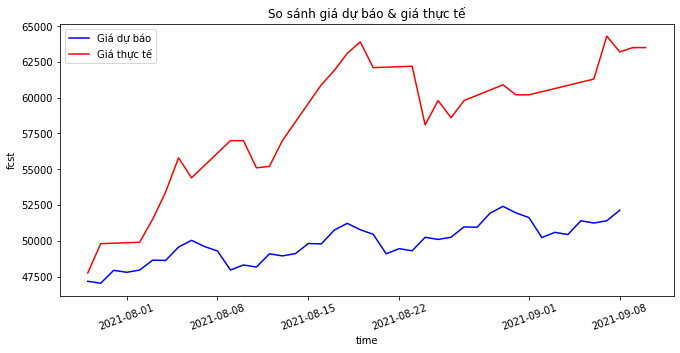

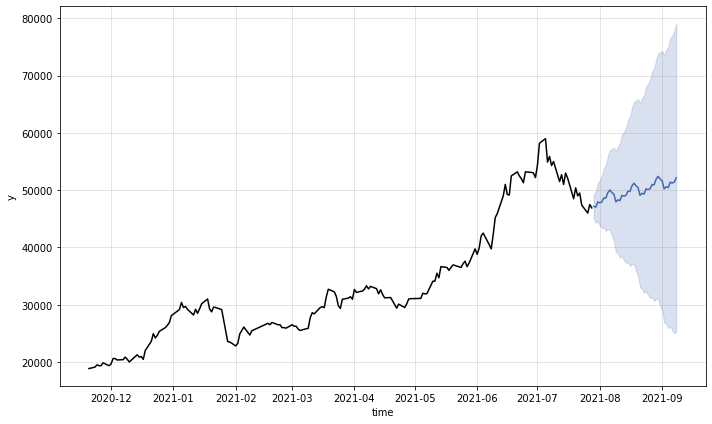

In [30]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
import warnings
warnings.simplefilter(action='ignore')
params = HoltWintersParams(trend="add",seasonal="mul",seasonal_periods=12,)
m = HoltWintersModel(data=ts, params=params)
m.fit()
fcst = m.predict(steps=42, alpha = 0.1)
test['Date'] = pd.to_datetime(test['Date'])
import seaborn as sns
plt.figure(figsize = (11,5))
plt.xticks(rotation=20)
plt.title('So sánh giá dự báo & giá thực tế')
sns.lineplot(x=fcst['time'], y=fcst['fcst'], label="Giá dự báo", color="b")
sns.lineplot(x=test['Date'], y=test['Close'], label ="Giá thực tế", color = 'red')
m.plot()

### **Model Vector autoregression (VAR)**
Vector autoregression (VAR) là một thuật toán dự báo đa biến, cũng được hỗ trợ sẵn trong Kats. Bây giờ chúng ta sẽ áp dụng VAR để dự báo xu hướng giá mở cửa & đóng cửa nhé.

Phần plot của Kats.VARModel hơi chuối, nhìn tạm nhé mn.

In [31]:
data = df
data['time'] = pd.to_datetime(data['Date'])
data = data.drop(['Date','Time','High','Low'],axis = 1)
multi_ts = TimeSeriesData(data)

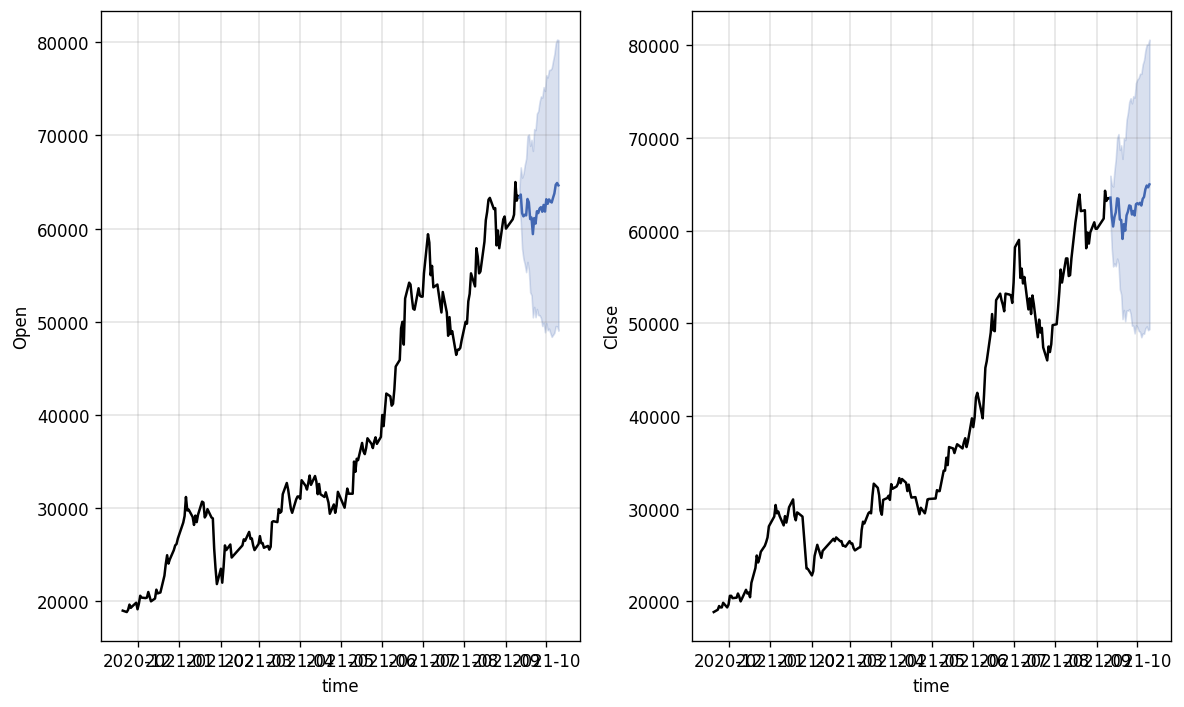

In [32]:
from kats.models.var import VARModel, VARParams
params = VARParams()
m = VARModel(multi_ts, params)
m.fit()
fcst = m.predict(steps=30)
m.plot()
plt.show()

## **Lời cuối:**

Bài viết này chia sẻ đến cộng đồng đầu tư những bước đi đến với ứng dụng Machine Learning trong dự báo giá cổ phiếu. Có thể nó sẽ góp phần tối ưu hóa quá trình đầu tư của bạn, cũng như cải thiện kỹ năng viết bài của mình :))

Nếu thích bạn có thể kết nối bạn bè, hoặcđọc thêm các bài viết khác của mình trên https://www.cafechungkhoan.com